In [11]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv('../datasets/Position_Salaries.csv')

In [4]:
x = df[['Level']]
y = df['Salary']

In [6]:
reg = DecisionTreeRegressor()

In [8]:
reg.fit(x,y)

DecisionTreeRegressor()

In [9]:
reg.score(x,y)

1.0

In [11]:
ypred = reg.predict(x)

In [12]:
df['ypred'] = ypred

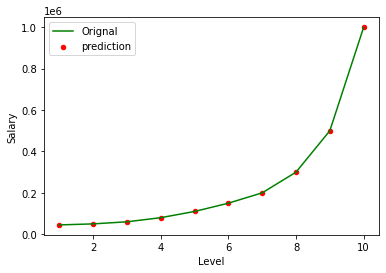

In [13]:
ax = df.plot.scatter(x='Level',y='Salary',label='Orignal',color='red')
df.plot.line(x='Level',y='ypred',label='prediction',ax=ax,color='green')
plt.show()

In [17]:
from sklearn.tree import plot_tree

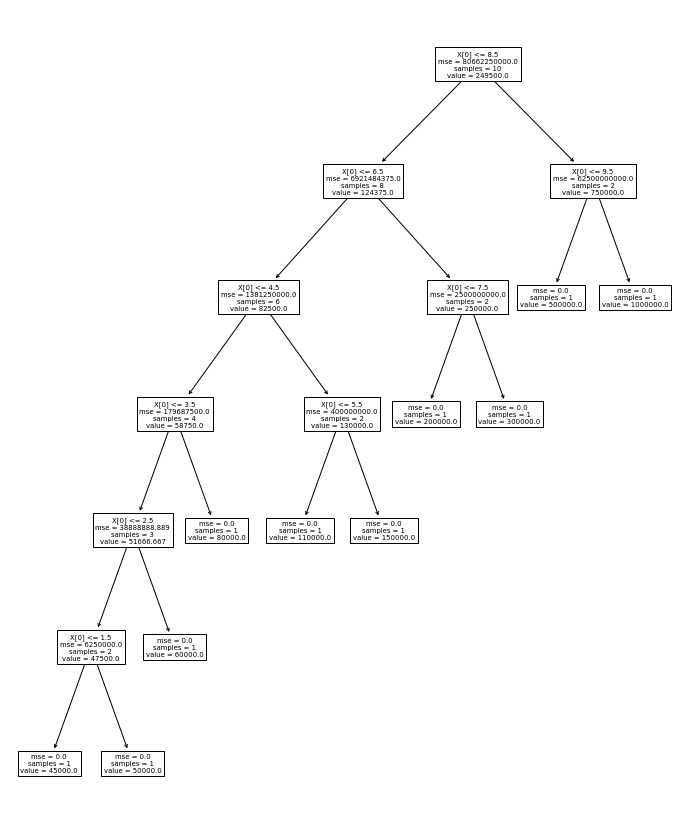

In [20]:
plt.figure(figsize=(12,15))
plot_tree(reg)
plt.show()

# test on another dataset

In [2]:
df = pd.read_csv('../datasets/diamond_pricing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
X =  df[['Paleonium','Pressure']]
y = df['Price']

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.2, random_state = 0)

In [13]:
reg2 = DecisionTreeRegressor(criterion='friedman_mse')
reg2.fit(xtrain, ytrain)
reg2.score(xtest,ytest)

0.9613038713018257

In [14]:
df['pred'] = reg2.predict(X)

In [15]:
df

,Paleonium,Pressure,Price,pred
0,17,6567,2810.280298,2810.280298
1,59,5253,1986.967089,1690.278454
2,123,9715,2083.132087,2083.132087
3,182,2073,2236.340285,2236.340285
4,133,6400,1903.323339,1903.323339
...,...,...,...,...
995,90,15039,1633.608018,1633.608018
996,49,10592,2316.189728,2288.116870
997,42,18435,1189.359047,1189.359047
998,10,13675,2922.682785,2922.682785


In [16]:
fig = px.scatter_3d(data_frame=df,x='Paleonium',y='Pressure',z='pred',hover_name='Price')
fig.write_html('decision.html',auto_open=True)

In [17]:
df['diff'] = df['Price'] - df['pred']

In [18]:
df

,Paleonium,Pressure,Price,pred,diff
0,17,6567,2810.280298,2810.280298,0.000000
1,59,5253,1986.967089,1690.278454,296.688635
2,123,9715,2083.132087,2083.132087,0.000000
3,182,2073,2236.340285,2236.340285,0.000000
4,133,6400,1903.323339,1903.323339,0.000000
...,...,...,...,...,...
995,90,15039,1633.608018,1633.608018,0.000000
996,49,10592,2316.189728,2288.116870,28.072858
997,42,18435,1189.359047,1189.359047,0.000000
998,10,13675,2922.682785,2922.682785,0.000000


In [19]:
fig = px.scatter_3d(data_frame=df,x='Paleonium',y='Pressure',z='pred',hover_name='Price',color='diff')
fig.write_html('decision.html',auto_open=True)

In [20]:
from templates import save_model

In [22]:
save_model(reg2,'../models/diamond_price_tree.pk')

True